# 吴恩达课后编程作业Course 1 - 神经网络和深度学习 - 第四周作业(1&2)

所有相关文件  见百度云->链接: https://pan.baidu.com/s/1-I_emMfyW9HkiNJs7hNjXQ  密码: rfmw

#  第一部分

第四周的作业一共有两部分，这里组合为一个文件  


我们以前训练过一个2层神经网络（带有一个隐藏层）。本周，你将建立一个深度神经网络，层次可随意设置！   
-你将实现构建深度神经网络所需的所有功能 ，并将使用这些函数构建用于图像分类的深度神经网络。  
**完成此任务后，您将能够：**  
-使用非线性单位（如ReLU）来改进模型  
-构建更深层次的神经网络（具有多个隐藏层）  
-实现一个易于使用的神经网络类   
-构建并应用深度神经网络进行监督学习。    

## 1 - Packages 

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) 
- [matplotlib](http://matplotlib.org) 
- dnn_utils 提供一些必要的函数
- testCases 提供测试案例  
- lr_utils 读取数据
- np.random.seed(1) 

函数包的具体内容与本文件位于同一文件夹

In [1]:

import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases import *
from dnn_utils import sigmoid , sigmoid_backward , relu , relu_backward 
import lr_utils


%matplotlib  inline
plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)


## 2-任务大纲
为了构建神经网络，我们要实现几个必要的“函数”。这些函数将用于构建两层神经网络和L层神经网络。    
-初始化两层网络和$L$层神经网络的参数。  
-实现正向传播模块（如下图中紫色所示）。  
-完成前向传播步骤的线性部分（产生$Z^{[l]}$）。  
-我们的软件包里已经有了激活函数（relu/sigmoid）。  
-将前两个步骤组合成一个新的[线性->激活]正向传播函数。  
-将[LINEAR->RELU]前向传播使用L-1次（对于第1层到第L-1层），最后一层使用[LINEAR->SIGMOID]（$L$层）。组合成为一个新的L_model_forward函数。   
-计算代价(cost)。   
-实现反向传播模块（下图中用红色表示）。  
-完成反向传播步骤的线性部分。  
-软件包已经给出了激活函数的梯度（relu_backward/sigmoid_backward）  
-将前两个函数组合成一个新的[LINEAR->ACTIVATION]反向传播函数。  
-组合一个完整的反向传播函数  
-最后更新参数。  

**注意**对于每个正向传播函数，都有一个对应的反向传播函数。这就是为什么在转发模块的每一步中，都会在缓存中存储一些值。缓存的值对于计算梯度非常有用。在反向传播模块中，我们将使用缓存的值计算梯度。  

可参考下面的图

<img src="images/final outline.png" style="width:800px;height:500px;">
<caption><center> **Figure 1**</center></caption><br>

## 3 - Initialization 


我们要实现两个函数  
1. 初始化两层神经网路的参数
2. 将1中的函数推广到L层

### 3.1 - 2-layer Neural Network

**Exercise**: 两层网络的初始化 

**Instructions**:
- 模型的结构为: *LINEAR -> RELU -> LINEAR -> SIGMOID*. 
- 使用 random 初始化权重矩阵. 使用 `np.random.randn(shape)*0.01` .
- 用0初始化偏差矩阵(biases). Use `np.zeros(shape)`.

注： 后面对于函数参数的描述 ， 我全用的英文 ， 个人觉得还是很好读懂的

In [2]:
def initialize_parameters(n_x , n_h , n_y):
    # 参数初始化函数
    # 参数描述如下
    """
    Argument: 
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns: 
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h , n_x)
                    b1 -- bias vector of shape (n_h , 1)
                    W2 -- weight matris of shape (n_y , n_h)
                    b2 -- bias vector of shape (n_y , 1)

    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h , n_x) * 0.01
    b1 = np.zeros(shape=(n_h , 1))
    W2 = np.random.randn(n_y , n_h) * 0.01
    b2 = np.zeros(shape=(n_y , 1))
    
    # 确保格式正确
    assert(W1.shape == (n_h , n_x))
    assert(b1.shape == (n_h , 1))
    assert(W2.shape == (n_y , n_h))
    assert(b2.shape == (n_y , 1))
    
    parameters = {
        "W1": W1,
        "b1": b1, 
        "W2": W2, 
        "b2": b2
    }
    
    return parameters

In [3]:
# test
parameters = initialize_parameters(2,2,1)

print("W1 = " + str(parameters["W1"]) )
print("b1 = " + str(parameters["b1"]) )
print("W2 = " + str(parameters["W2"]) )
print("b2 = " + str(parameters["b2"]) )



W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


**正确输出**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td> [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]] </td> 
  </tr>

  <tr>
    <td> **b1**</td>
    <td>[[ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[ 0.00865408 -0.02301539]]</td>
  </tr>
  
  <tr>
    <td> **b2** </td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>

### 3.2 - L-layer Neural Network

L层神经网络的初始化更为复杂，因为有更多的权重矩阵和偏差向量。完成`initialize_parameters_deep`时，应确保各层之间的尺寸匹配。回想一下，$n^{[l]}$是层$l$中的单元数。   
例如，如果我们的输入$X$的大小是$（12288,209）$（其中$m=209$），那么：


<table style="width:100%">


   <tr>
        <td> ** name ** </td>
        <td> ** Shape of W ** </td> 
        <td> ** Shape of b **  </td> 
        <td> ** Activation ** </td>
        <td> ** Shape of Activation ** </td> 
   </tr>
    
   <tr>
        <td> **Layer 1** </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td>  
        <td> $(n^{[1]},209) $  </td> 
   </tr>
    
   <tr>
        <td> **Layer 2** </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td>$(n^{[2]}, 209)$ </td>
   </tr>
   
   <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
   </tr>
    
   <tr>
        <td> **Layer L-1** </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
   </tr>
    
    
   <tr>
        <td> **Layer L** </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
   </tr>

</table>


注意，在python中计算$wx+b$时，它执行广播。例如

 if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**Exercise**: Implement initialization for an L-layer Neural Network. 

**Instructions**:
- 模型结构为  *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., 它有 $L-1$ 层是使用 ReLU activation function ，然后是使用sigmoid activation function的输出层.
- 使用 `np.random.rand(shape) * 0.01`初始化参数.
- 使用 `np.zeros(shape)`初始化biases矩阵.
- 我们将$n^{[l]}$存储在变量 `layer_dims `中，这是不同层中的单元数  例如，上周`平面数据分类模型`的`layer_dims`应该是[2,4,1]：有两个输入，一个隐藏层有4个隐藏单元，一个输出层有1个输出单元。因此，表示`W1`的形状是（4,2），`b1`是（4,1），`W2`是（1,4），`b2`是（1,1）。现在把它推广到$L$层！ 

In [4]:
def initialize_parameters_deep(layer_dim):
    """
    Argument: 
    layer_dims -- python array(list) containing the dimensions of each kayer in our network
    
    Returns: 
    parameters -- python dictionary containing your parameters "W1" , "b1" ,..., "WL" , "bL": 
                    Wl -- weight matrix of shape (layer_dims[l] , layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l] , 1)
                    
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dim)
    
    for l in range(1,L): 
        parameters['W' + str(l)] = np.random.randn(layer_dim[l] , layer_dim[l-1]) / np.sqrt(layer_dim[l-1])
        parameters['b' + str(l)] = np.zeros( (layer_dim[l] , 1) )
        
        # 确保格式正确
        assert( parameters['W' + str(l)].shape == (layer_dim[l] , layer_dim[l-1]) )
        assert( parameters['b' + str(l)].shape == (layer_dim[l] , 1) )
        
        
    
    return parameters

In [5]:
# test
parameters = initialize_parameters_deep([5,4,3])

print("W1 = " + str(parameters["W1"]) )
print("b1 = " + str(parameters["b1"]) )
print("W2 = " + str(parameters["W2"]) )
print("b2 = " + str(parameters["b2"]) )

W1 = [[ 0.79989897  0.19521314  0.04315498 -0.83337927 -0.12405178]
 [-0.15865304 -0.03700312 -0.28040323 -0.01959608 -0.21341839]
 [-0.58757818  0.39561516  0.39413741  0.76454432  0.02237573]
 [-0.18097724 -0.24389238 -0.69160568  0.43932807 -0.49241241]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.59252326 -0.10282495  0.74307418  0.11835813]
 [-0.51189257 -0.3564966   0.31262248 -0.08025668]
 [-0.38441818 -0.11501536  0.37252813  0.98805539]]
b2 = [[0.]
 [0.]
 [0.]]


**正确输出**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td>[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]</td> 
  </tr>
  
  <tr>
    <td>**b1** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2** </td>
    <td>[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]</td> 
  </tr>
  
  <tr>
    <td>**b2** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
</table>

## 4 - 前向传播函数

### 4.1 - Linear Forward 

我们需要完成三个函数
- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

线性正向传播用如下方程（已向量化）:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

其中 $A^{[0]} = X$. 



**now**: 构建正向传播的线性部分



In [6]:
def linear_forward(A , W , b): 
    """
    implement the linear paet of a layer's forward propagation.
    
    Arguments: 
    A -- activations from previous layer(or input data): (size of previous layer , number of examples)
    W -- weights matrix : numpy array of shape (size of current layer , size of previous layer)
    b -- bias vector , numpy array of shape (size of current layer , 1 )
    
    Returns: 
    Z -- the input of the activation function , also called pre-activation parameter
    Cache -- a python dictionary containing "A"  , "W" and "b" ; stored for compute the backward pass efficiently
    
    
    """
    Z = np.dot(W , A) + b
    
    
    assert(Z.shape == (W.shape[0] , A.shape[1]))
    cache = (A , W , b)
    
    return Z , cache
    
    

In [7]:
# test 
A, W , b = linear_forward_test_case()

Z , linear_cache = linear_forward(A , W , b)
print("Z = " + str(Z))


Z = [[ 3.26295337 -1.23429987]]


**正确输出**:

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 3.26295337 -1.23429987]] </td> 
  </tr>
  
</table>

### 4.2 - Linear-Activation Forward

我们有；两个激活函数:

- **Sigmoid**: 数学公式： $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$.前面函数包已经提供了`sigmoid`功能。此函数返回**两个**项：激活值`a`和包含`Z`的`cache`（这是我们将输入到反向函数中的内容）。  
调用方法：  
``` python
A, activation_cache = sigmoid(Z)
```

 

- **ReLU**:ReLU的数学公式为 $A = RELU(Z) = max(0, Z)$. 前面函数包已经提供了`relu`功能。此函数返回**两个**项：激活值`A`和包含`Z`的`cache`（这是我们将输入到反向函数中的内容）。  

调用方法：
``` python
A, activation_cache = relu(Z)
```

In [8]:
def linear_activation_forward(A_prev,W,b,activation):
    
    """
    implement the forward propagation for the  LINEAR-> ACTIVATION layer
   
   
    Arguments: 
    A_prev -- activations from precvious layer (or input data) : (size of previous_layer , number of examples)
    W -- weights matrix : numpy array of shape (soze of currens layer , size of previous layer)
    b -- bias vector , numpy array of shape (size of the current layer , 1)
    activation -- the activation to be used in this layer , stored as text string "sigmoid" or "relu"
   
   
    Returns:
    A -- the output of the activation function, alse called the post-activation value
    cache -- a python dictionary containing "linear_cache" and "actication_cache";
            stored for computing the backward pass efficiently
               
    """
    
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert(A.shape == (W.shape[0],A_prev.shape[1]))
    cache = (linear_cache,activation_cache)
    
    return A,cache


In [9]:
# test
A_prev , W , b = linear_activation_forward_test_case()

A , linear_activation_cache = linear_activation_forward(A_prev , W , b, activation='sigmoid')
print('With simoid: A = ' +str(A))

A , linear_activation_cache = linear_activation_forward(A_prev , W , b , activation='relu')
print('With relu: A = ' + str(A))



With simoid: A = [[0.96890023 0.11013289]]
With relu: A = [[3.43896131 0.        ]]


**正确输出**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96076066  0.99961336]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[3.43896131 0.        ]]</td> 
  </tr>
</table>


### d) L-Layer Model 

我们把两层模型需要的前向传播函数做完了，那多层网络模型的前向传播是怎样的呢？我们调用上面的那两个函数来实现它，为了在实现L层神经网络时更加方便，我们需要一个函数来复制前一个函数（带有RELU的linear_activation_forward）L-1次，然后用一个带有SIGMOID的linear_activation_forward跟踪它，我们来看一下它的结构是怎样的：

<img src="images/model_architecture_kiank.png" style="width:600px;height:300px;">
<caption><center> **Figure 2** : *[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model</center></caption><br>

**练习**：实现上述模型的前向传播

**Instruction**: 在下满的代码中：  `AL` 表示为 $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (有时也叫 `Yhat`, i.e., this is $\hat{Y}$.) 

**Tips**:
- 使用前面已经实现的函数
- 使用循环重复 [LINEAR->RELU] (L-1) 次
- 别忘了记录`caches`:列表中的缓存。要将新值`c`添加到`list`，可以使用`list.append（c）`。

In [10]:
def L_model_forward(X , parameters):
    """
    Implement forward propagation for the [LINEAR ->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data , numpy array of shaoe (input size , number of examples)
    parameters -- output of initialize_paramater_deep()
    
    Returns: 
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward(there are L-1 of them , indexed from 0-L-2)
                the cache of linear_sigmoid_forward(there is one , indexed L-1)
            
    
    """
    
    caches =[]
    
    A = X
    L = len(parameters) // 2
    
    # Implement [LINEAR -> RELU] * (L-1) . Add "cache" to the "caches" list
    for l in range(1 , L): 
        A_prev = A
        A , cache = linear_activation_forward(A_prev, 
                                              parameters['W' + str(l)],
                                              parameters['b' + str(l)], 
                                              activation='relu'
                                             )
        caches.append(cache)
        
    
    # L layer activation sigmoid 
    AL , cache = linear_activation_forward(A,
                                           parameters['W' + str(L)], 
                                           parameters['b' + str(L)], 
                                           activation='sigmoid'
                                          )
    caches.append(cache)
    
    assert(AL.shape == (1 , X.shape[1]))
    
    return AL , caches

In [11]:
X , parameters = L_model_forward_test_case()
AL , caches = L_model_forward(X , parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))


AL = [[0.17007265 0.2524272 ]]
Length of caches list = 2


**正确输出**:

<table style="width:40%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.17007265 0.2524272]]</td> 
  </tr>
  <tr>
    <td> **Length of caches list ** </td>
    <td > 2</td> 
  </tr>
</table>

## 5 - Cost function

现在我们已经实现的前向传播，现在我们需要计算cost 因为我们要检查模型是否在学习


 计算 cost $J$, 使用如下公式: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [12]:
def compute_cost(AL , Y): 
    """
    Implement the cost founction defined by equation(7). 
    
    Arguments: 
    AL -- probility vector corresponding to you label preditions , shape (1,number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1 , number of examples)
    
    Returns: 
    cost -- cross-entroy cost
    """
    m = Y.shape[1]
    
    cost = (-1 / m) * np.sum( np.multiply(Y , np.log(AL)) + np.multiply(1-Y , np.log(1-AL)) )
    
    
    cost = np.squeeze(cost)
    
    assert(cost.shape == ())
    
    return cost
    
    

In [13]:
# test
Y , AL = compute_cost_test_case()
print("cost = " + str(compute_cost(AL , Y)))

cost = 0.41493159961539694


**正确输出**:

<table>

   <tr>
      <td>**cost** </td>
      <td> 0.41493159961539694 </td> 
   </tr>
    
</table>

## 6 - Backward propagation module

反向传播-> 计算代价函数相对于参数的梯度（求导）

**流程->**: 
<img src="images/backprop_kiank.png" style="width:650px;height:250px;">


<!-- 
For those of you who are expert in calculus (you don't need to be to do this assignment), the chain rule of calculus can be used to derive the derivative of the loss $\mathcal{L}$ with respect to $z^{[1]}$ in a 2-layer network as follows:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

In order to calculate the gradient $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, you use the previous chain rule and you do $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. During the backpropagation, at each step you multiply your current gradient by the gradient corresponding to the specific layer to get the gradient you wanted.

Equivalently, in order to calculate the gradient $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$, you use the previous chain rule and you do $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

This is why we talk about **backpropagation**.
!-->

与正向传播类似，反向传播步骤如下： 

- LINEAR backward
- LINEAR -> ACTIVATION backward 其中 ACTIVATION 计算 ReLU or sigmoid activation的 导数
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (完整的模型)

### 6.1 - Linear backward
对于 $l$ 层, 线性部分的公式： : $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ 

假设你已经有了 $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. 计算-> $(dW^{[l]}, db^{[l]} dA^{[l-1]})$.


<img src="images/linearback_kiank.png" style="width:250px;height:300px;">
<caption><center> **Figure 4** </center></caption>

参考公式： 
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


**Exercise**: 使用上面的公式实现 linear_backward().

In [14]:
def linear_backward(dZ , cache): 
    """
    Implement the linear portion of backward propagation for a single layer (layer l)
    
    Arguments: 
    dz -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of value (A_prev , W , b) coming from the forward propagation in current layer
    
    Returns: 
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1) , same shaoe as a_prev
    dW -- Gradient of the cost with respect to W (current layer l) , same shape as W
    db -- Gradient of the cost with respect to b (current layer l) , same shaoe as b
    
    """
    
    
    
    A_prev , W , b = cache
    m = A_prev.shape[1]
    
    dW = np.dot( dZ , A_prev.T ) / m
    db = np.sum(dZ , axis=1 , keepdims=True) / m
    dA_prev = np.dot(cache[1].T , dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
#     assert (isinstance(db,float)) 
    
    return dA_prev , dW , db

In [15]:
dZ , linear_cache = linear_backward_test_case()
dA_prev , dW , db = linear_backward(dZ , linear_cache)
print("dA_prev = " + str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db))



dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


**正确输出**: 

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]] 
      </td> 
  </tr> 
  
  <tr>
        <td> **dW** </td>
        <td > [[-0.10076895  1.40685096  1.64992505]]  </td> 
  </tr>
    
  <tr>
        <td> **db** </td>
        <td> 0.5062944750065832 </td> 
   </tr> 
    
</table>



### 6.2 - Linear-Activation backward

现在，创建一个函数，合并**`linear_backward`** 实现**`linear_activation_backward`**


为了`linear_activation_backward`, 我们的h函数包里提供了两个函数： 
- **`sigmoid_backward`**: 实现sigmoid单元的反向传播. 调用方式如下:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: 实现relu单元的反向传播. 调用方式如下 :

```python
dZ = relu_backward(dA, activation_cache)
``` 
实现：   
If $g(.)$ 是对应的激活函数, 那么：   
`sigmoid_backward` 和 `relu_backward` 的计算方式是：  $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  



In [16]:
def linear_activation_backward(dA , cache , activation): 
    """
    Implement the backward propogation for the LINEAR->ACTIVATION layer
    
    Arguments:
    dA -- post-avtivation gradient gor current layer l
    cache -- tuple of values (linear_cache , activation_cache) we store for computing backward propogation efficiently
    activation -- the activation to be used in this layer , stored as s text string: "sigmoid" or "relu"
    
    Returns: 
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1) , same shape as A_prev
    dW -- Gradient of the cost with respect to W (currens layer l), same shape as W
    db -- Gradient of the cost with resoect to b (current layer l)，same shape as b
    
    """
    
    linear_cache , activation_cache = cache
    
    if activation == 'relu': 
        dZ = relu_backward(dA , activation_cache)
    
    elif activation == 'sigmoid': 
        dZ = sigmoid_backward(dA , activation_cache)
        
    
    
    dA_prev , dW , db = linear_backward(dZ , linear_cache)
    
    
    return dA_prev , dW , db
    
    
    
    

In [17]:
# test
AL , linear_activation_cache = linear_activation_backward_test_case()

dA_prev , dW , db = linear_activation_backward(AL , linear_activation_cache , activation= 'sigmoid')
print("sigmoid: ")
print("dA_prev = " + str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db))

dA_prev , dW , db = linear_activation_backward(AL , linear_activation_cache , activation='relu')
print("relu: ")
print("dA_prev = " + str(dA_prev))
print("dW = " + str(dW))
print("db = " + str(db))




sigmoid: 
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]
relu: 
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


output： 
  
**sigmoid:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
    <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]</td> 

  </tr> 
  
   <tr>
    <td > dW </td> 
    <td > [[ 0.10266786  0.09778551 -0.01968084]] </td> 
  </tr> 
  
  <tr>
    <td > db </td> 
    <td > -0.057296222176291135 </td> 
  </tr> 
</table>




**relu**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td> 

  </tr> 
  
  <tr>
    <td > dW </td> 
           <td > [[ 0.44513824  0.37371418 -0.10478989]] </td> 
  </tr> 
  
  <tr>
    <td > db </td> 
           <td > -0.2083789237027353 </td> 
  </tr> 
</table>



### 6.3 - L-Model Backward 


现在，实现整个网络的反向传播。回想一下，在实现'L_model_forward'函数时，在每次迭代中，我们存储了一个包含（X、W、b和z）的cache。在反向传播模块中，您将使用这些变量来计算梯度。所以，在'L_model_backward'函数中，我们将从层$L$开始向后迭代所有隐藏层。在每个步骤中，您将使用层$l$的缓存值通过层$l$进行反向传播。参考线图。


<img src="images/mn_backward.png" style="width:450px;height:300px;">
<caption><center>  ** Figure 5 ** : Backward pass  </center></caption>



我们知道输出为, 
$A^{[L]} = \sigma(Z^{[L]})$. 所以，我们需要计算 `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
故 使用下面的公式:
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # cost对AL的导数
```

然后就可以使用dAL进行反向传播，就像图五  
同时，我们要存储梯度  如下->  

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

例如, 对于 $l=3$ 的情况 $dW^{[l]}$ in `grads["dW3"]`.

现在 为 *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* 模型 实现反向传播.

In [18]:
def L_model_backward(AL , Y , caches): 
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR->SIGMOID group    
    
    Arguments: 
    AL -- probability vector , output of the forward propagation (L_model_forward() )
    Y -- true "label" vector (containing 0 if no-cat, 1 if cat)
    caches -- list of chaches containing: 
                every cache of linesr_activation_forward() with "relu" (it's caches[l] , for l in range(L-1) i.e l = 0...L-2)      
                the cache of linear_activation_forward() with "sigmoid"  (it's caches[L-1])
                
    
    Returns: 
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
        
    """
    
    grads = {}
    
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL = - ( np.divide(Y , AL) - np.divide(1-Y , 1-AL)  )
    
    current_cache = caches[L-1]
    grads["dA" + str(L)] , grads["dW" + str(L)] , grads["db" + str(L)] = linear_activation_backward( dAL , current_cache , activation='sigmoid' )
    
    for l in reversed( range(L-1) ): 
#         
        current_cache = caches[l]
        dA_prev_temp , dW_temp , db_temp = linear_activation_backward( grads["dA" + str(l+2)] , current_cache , activation='relu')
        grads["dA" + str(l+1)] = dA_prev_temp
        grads["dW" + str(l+1)] = dW_temp
        grads["db" + str(l+1)] = db_temp
        
        
    return grads
    
    
    

In [19]:
#test
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))


dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


**正确输出**

<table style="width:60%">
  
   <tr>
    <td > dW1 </td> 
    <td > [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]] </td> 
  </tr> 
  
   <tr>
     <td > db1 </td> 
     <td > [-0.22007063  0.         -0.02835349] </td> 
   </tr> 
  
  <tr>
  <td > dA1 </td> 
           <td > [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]] </td> 

  </tr> 
</table>



### 6.4 - Update Parameters

使用计算出的梯度更新参数: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

$\alpha$ 是学习率.   
注： 计算所得的梯度  存储于一个字典中

实现`update_parameters()` 用于更新参数



In [20]:
def update_parameters(parameters , grads , learning_rate): 
    """
    Update parameters using gradient descent
    
    Arguments: 
    parameters -- python dictionary containing your parameters
    grad -- python dictionary containing your gradients , output of L_model_backward
    
    Returns;
    
    parameters -- python dictionary containing your update parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2
    for l in range(L): 
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    
    return parameters
        

In [21]:
# test
parameters , grads = update_parameters_test_case()
parameters = update_parameters(parameters , grads , 0.1)

print ("W1 = " + str(parameters["W1"]))
print ("b1 = " + str(parameters["b1"]))
print ("W2 = " + str(parameters["W2"]))
print ("b2 = " + str(parameters["b2"]))


W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**正确输出**:

<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr> 
    
  <tr>
    <td > b1 </td> 
    <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr>
    
  <tr>
    <td > W2 </td> 
           <td >[[-0.55569196  0.0354055   1.32964895]]  </td> 
  </tr> 
  
  <tr>
    <td > b2 </td> 
    <td > [[-0.84610769]] </td> 
  </tr> 
  
</table>



## 7 - Conclusion

 
现在我们已经实现了构建深度神将网络所需的所有函数  



下一步我们将实现两个模型：  
- A two-layer neural network
- An L-layer neural network

并将其应用于猫的识别

# 第二部分

# Deep Neural Network for Image Classification: Application

这是本周的最后一项编程作业  
我们将利用上一部分实现的函数，构建深度神将网络，应用于猫的识别


Let's get started!

## 1 - Dataset

这里的数据集和前面逻辑回归的数据集一模一样，所以就不多做介绍

In [22]:
train_x_orig, train_y, test_x_orig, test_y, classes =lr_utils.load_dataset()



y = 0. It is a non-cat picture. 


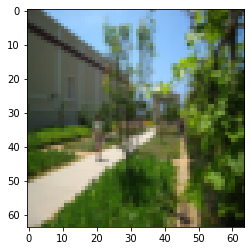

In [23]:
index = 8
plt.imshow(train_x_orig[index])

print("y = " + str(train_y[0,index]) + ". It is a " + classes[train_y[0,index]].decode("utf-8" ) + " picture. " )


In [24]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("Number of training examples : " + str(m_train))
print("Number of testing examoles : " + str(m_test))
print("Each image is of size : (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_x_orig shape : " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples : 209
Number of testing examoles : 50
Each image is of size : (64, 64, 3)
train_x_orig shape : (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


标准化


<img src="images/imvectorkiank.png" style="width:450px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

In [25]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0] , -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0] , -1).T

train_x = train_x_flatten / 255
test_x = test_x_flatten / 255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## 2 - Architecture of your model

下一步，我们要构建两个模型

- A 2-layer neural network
- An L-layer deep neural network

并且尝试不同的L，比较模型的性能


### 2.1 - 2-layer neural network

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> 模型概括为: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>


### 2.2 - L-layer deep neural network



<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> 模型概括为: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>



### 2.3 - General methodology

与往常一样，我们将遵循深度学习方法来构建模型:
    1. 初始化参数，定义超参数
    2. 循环迭代:
        a. 前向传播
        b. 计算代价
        c. 反向传播
        d. 使用计算所得的梯度，更新参数
    4. 预测

现在开始吧

## 3 - Two-layer neural network

函数参考：  

```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [26]:
def two_layer_model( X , Y , layers_dims , learning_rate = 0.0075 , num_iterations = 3000 , print_cost = False  , isPlot = True): 
    
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    isPlot -- whether to draw cost curve
    """
    
    
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    
    (n_x , n_h , n_y) = layers_dims
    
    parameters = initialize_parameters(n_x , n_h , n_y)
    
    W1 = parameters["W1"]
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    for i in range(0 , num_iterations): 
        # 前向传播
        A1 , cache1 = linear_activation_forward(X , W1 , b1 , 'relu')
        A2 , cache2 = linear_activation_forward(A1 , W2 , b2 , 'sigmoid')
        
        # 计算代价
        cost = compute_cost(A2 , Y)
        
        # 反向传播
        dA2 = - ( np.divide(Y , A2) - np.divide(1-Y , 1-A2) )
        
        dA1 , dW2 , db2 = linear_activation_backward(dA2 , cache2 , activation='sigmoid')
        dA0 , dW1 , db1 = linear_activation_backward(dA1 , cache1 , activation='relu')
        
        # 保存梯度
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # 更新参数
        parameters = update_parameters(parameters , grads , learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # 打印代价
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # 绘制代价曲线
    if isPlot:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    return parameters
        
    

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203886
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.3052753636196264
Cost after iteration 1200: 0.27491377282130147
Cost after iteration 1300: 0.24681768210614838
Cost after iteration 1400: 0.19850735037466108
Cost after iteration 1500: 0.1744831811255662
Cost after iteration 1600: 0.17080762978096467
Cost after iteration 1700: 0.11306524562164721
Cost after iteration 1800: 0.09629426845937161
Cost after iteration 1900: 0.0834261795972687
Cost after iteration 2000: 0.07439078704319084
Cost after iteration 2100: 0.0663074813

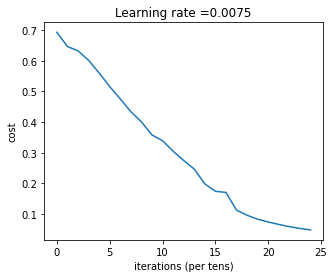

In [27]:
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x,n_h,n_y)

parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

预测函数

In [28]:
def predict( X , y , parameters ): 
    
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros( (1,m) )
    
    probas , caches = L_model_forward(X , parameters)
    
    for i in range(0 , probas.shape[1]): 
        if probas[0,i] > 0.5: 
            p[0,i] = 1
        else: 
            p[0,i] = 0
    
    print("准确率为 : " +  str( float( np.sum(p==y) ) / m ) )
    
    return p
    

In [29]:
predictions_train = predict(train_x, train_y, parameters) #训练集

准确率为 : 1.0


In [30]:
predictions_test = predict(test_x, test_y, parameters) #测试集


准确率为 : 0.72


## 4 - L-layer Neural Network

函数参考：  

```python
def initialize_parameters_deep(layer_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [31]:
def L_layer_model(X , Y , layer_dims , learning_rate=0.0075 , num_iterations=3000 , print_cost=False , isPlot = True ): 
    
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    isPlot -- whether to draw cost curve
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layer_dims)
    
    for i in range(0,num_iterations): 
        AL , caches = L_model_forward(X , parameters)
        
        cost = compute_cost(AL , Y)
        
        grads = L_model_backward(AL , Y , caches)
        
        parameters = update_parameters(parameters , grads , learning_rate)
        
        if print_cost and i % 100 ==0: 
            print("Cost after iteration %i : %f" % (i,cost))
            costs.append(cost)
            
    if isPlot: 
        plt.plot( np.squeeze(costs) )
        plt.ylabel('cost')
        plt.xlabel('iterations(pertens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
    return parameters
        
        

In [32]:
train_set_x_orig , train_set_y , test_set_x_orig , test_set_y , classes = lr_utils.load_dataset()

train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T 
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
train_y = train_set_y
test_x = test_x_flatten / 255
test_y = test_set_y



Cost after iteration 0 : 0.715732
Cost after iteration 100 : 0.674738
Cost after iteration 200 : 0.660337
Cost after iteration 300 : 0.646289
Cost after iteration 400 : 0.629813
Cost after iteration 500 : 0.606006
Cost after iteration 600 : 0.569004
Cost after iteration 700 : 0.519797
Cost after iteration 800 : 0.464157
Cost after iteration 900 : 0.408420
Cost after iteration 1000 : 0.373155
Cost after iteration 1100 : 0.305724
Cost after iteration 1200 : 0.268102
Cost after iteration 1300 : 0.238725
Cost after iteration 1400 : 0.206323
Cost after iteration 1500 : 0.179439
Cost after iteration 1600 : 0.157987
Cost after iteration 1700 : 0.142404
Cost after iteration 1800 : 0.128652
Cost after iteration 1900 : 0.112443
Cost after iteration 2000 : 0.085056
Cost after iteration 2100 : 0.057584
Cost after iteration 2200 : 0.044568
Cost after iteration 2300 : 0.038083
Cost after iteration 2400 : 0.034411


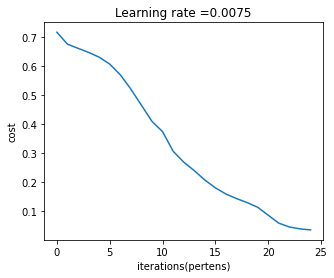

In [33]:
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model
parameters = L_layer_model(train_x, train_y, layers_dims ,num_iterations = 2500, print_cost = True,isPlot=True)



In [34]:
predictions_train = predict(train_x, train_y, parameters) #训练集

准确率为 : 0.9952153110047847


In [35]:
predictions_test = predict(test_x, test_y, parameters) #训练集

准确率为 : 0.78


##  5 Results Analysis

看一下被错误标记的图片

In [36]:
def print_mislabeled_images( classes , X , y , p ):
    
    """
	绘制预测和实际不同的图像。
	    X - 数据集
	    y - 实际的标签
	    p - 预测
    """
    
    a = p + y
    mislabeled_indices = np.asarray( np.where( a == 1 ) )
    plt.rcParams['figure.figsize'] = (40.0,40.0)
    num_images = len(mislabeled_indices[0])
    for i in range(num_images): 
        index = mislabeled_indices[1][i]
        
        plt.subplot(2 , num_images, i+1)
        plt.imshow( X[:,index].reshape(64,64,3) , interpolation= 'nearest' )
        plt.axis('off')
        plt.title( "Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8") )
    

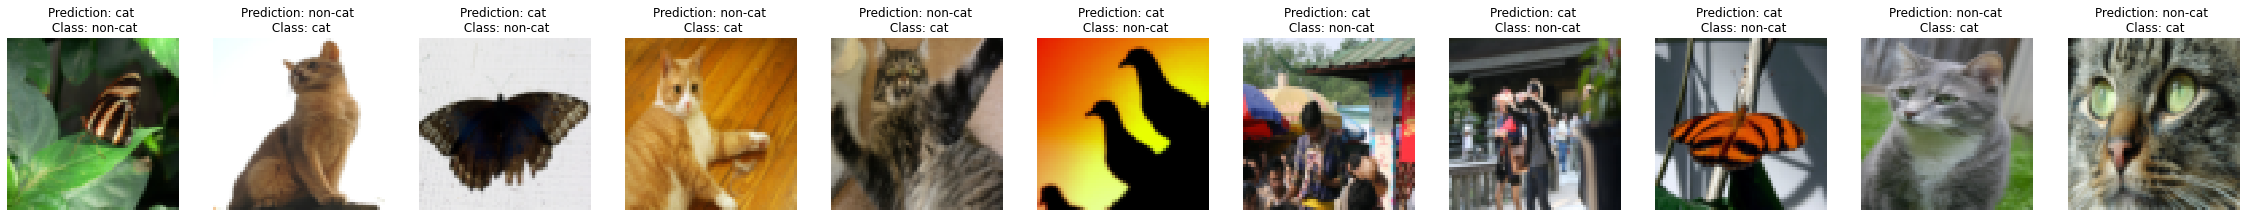

In [37]:
print_mislabeled_images(classes, test_x, test_y, predictions_test)

## 7) Test with your own image (optional/ungraded exercise) 

准确率为 : 1.0
y = 1.0, your L-layer model predicts a "cat"picture.


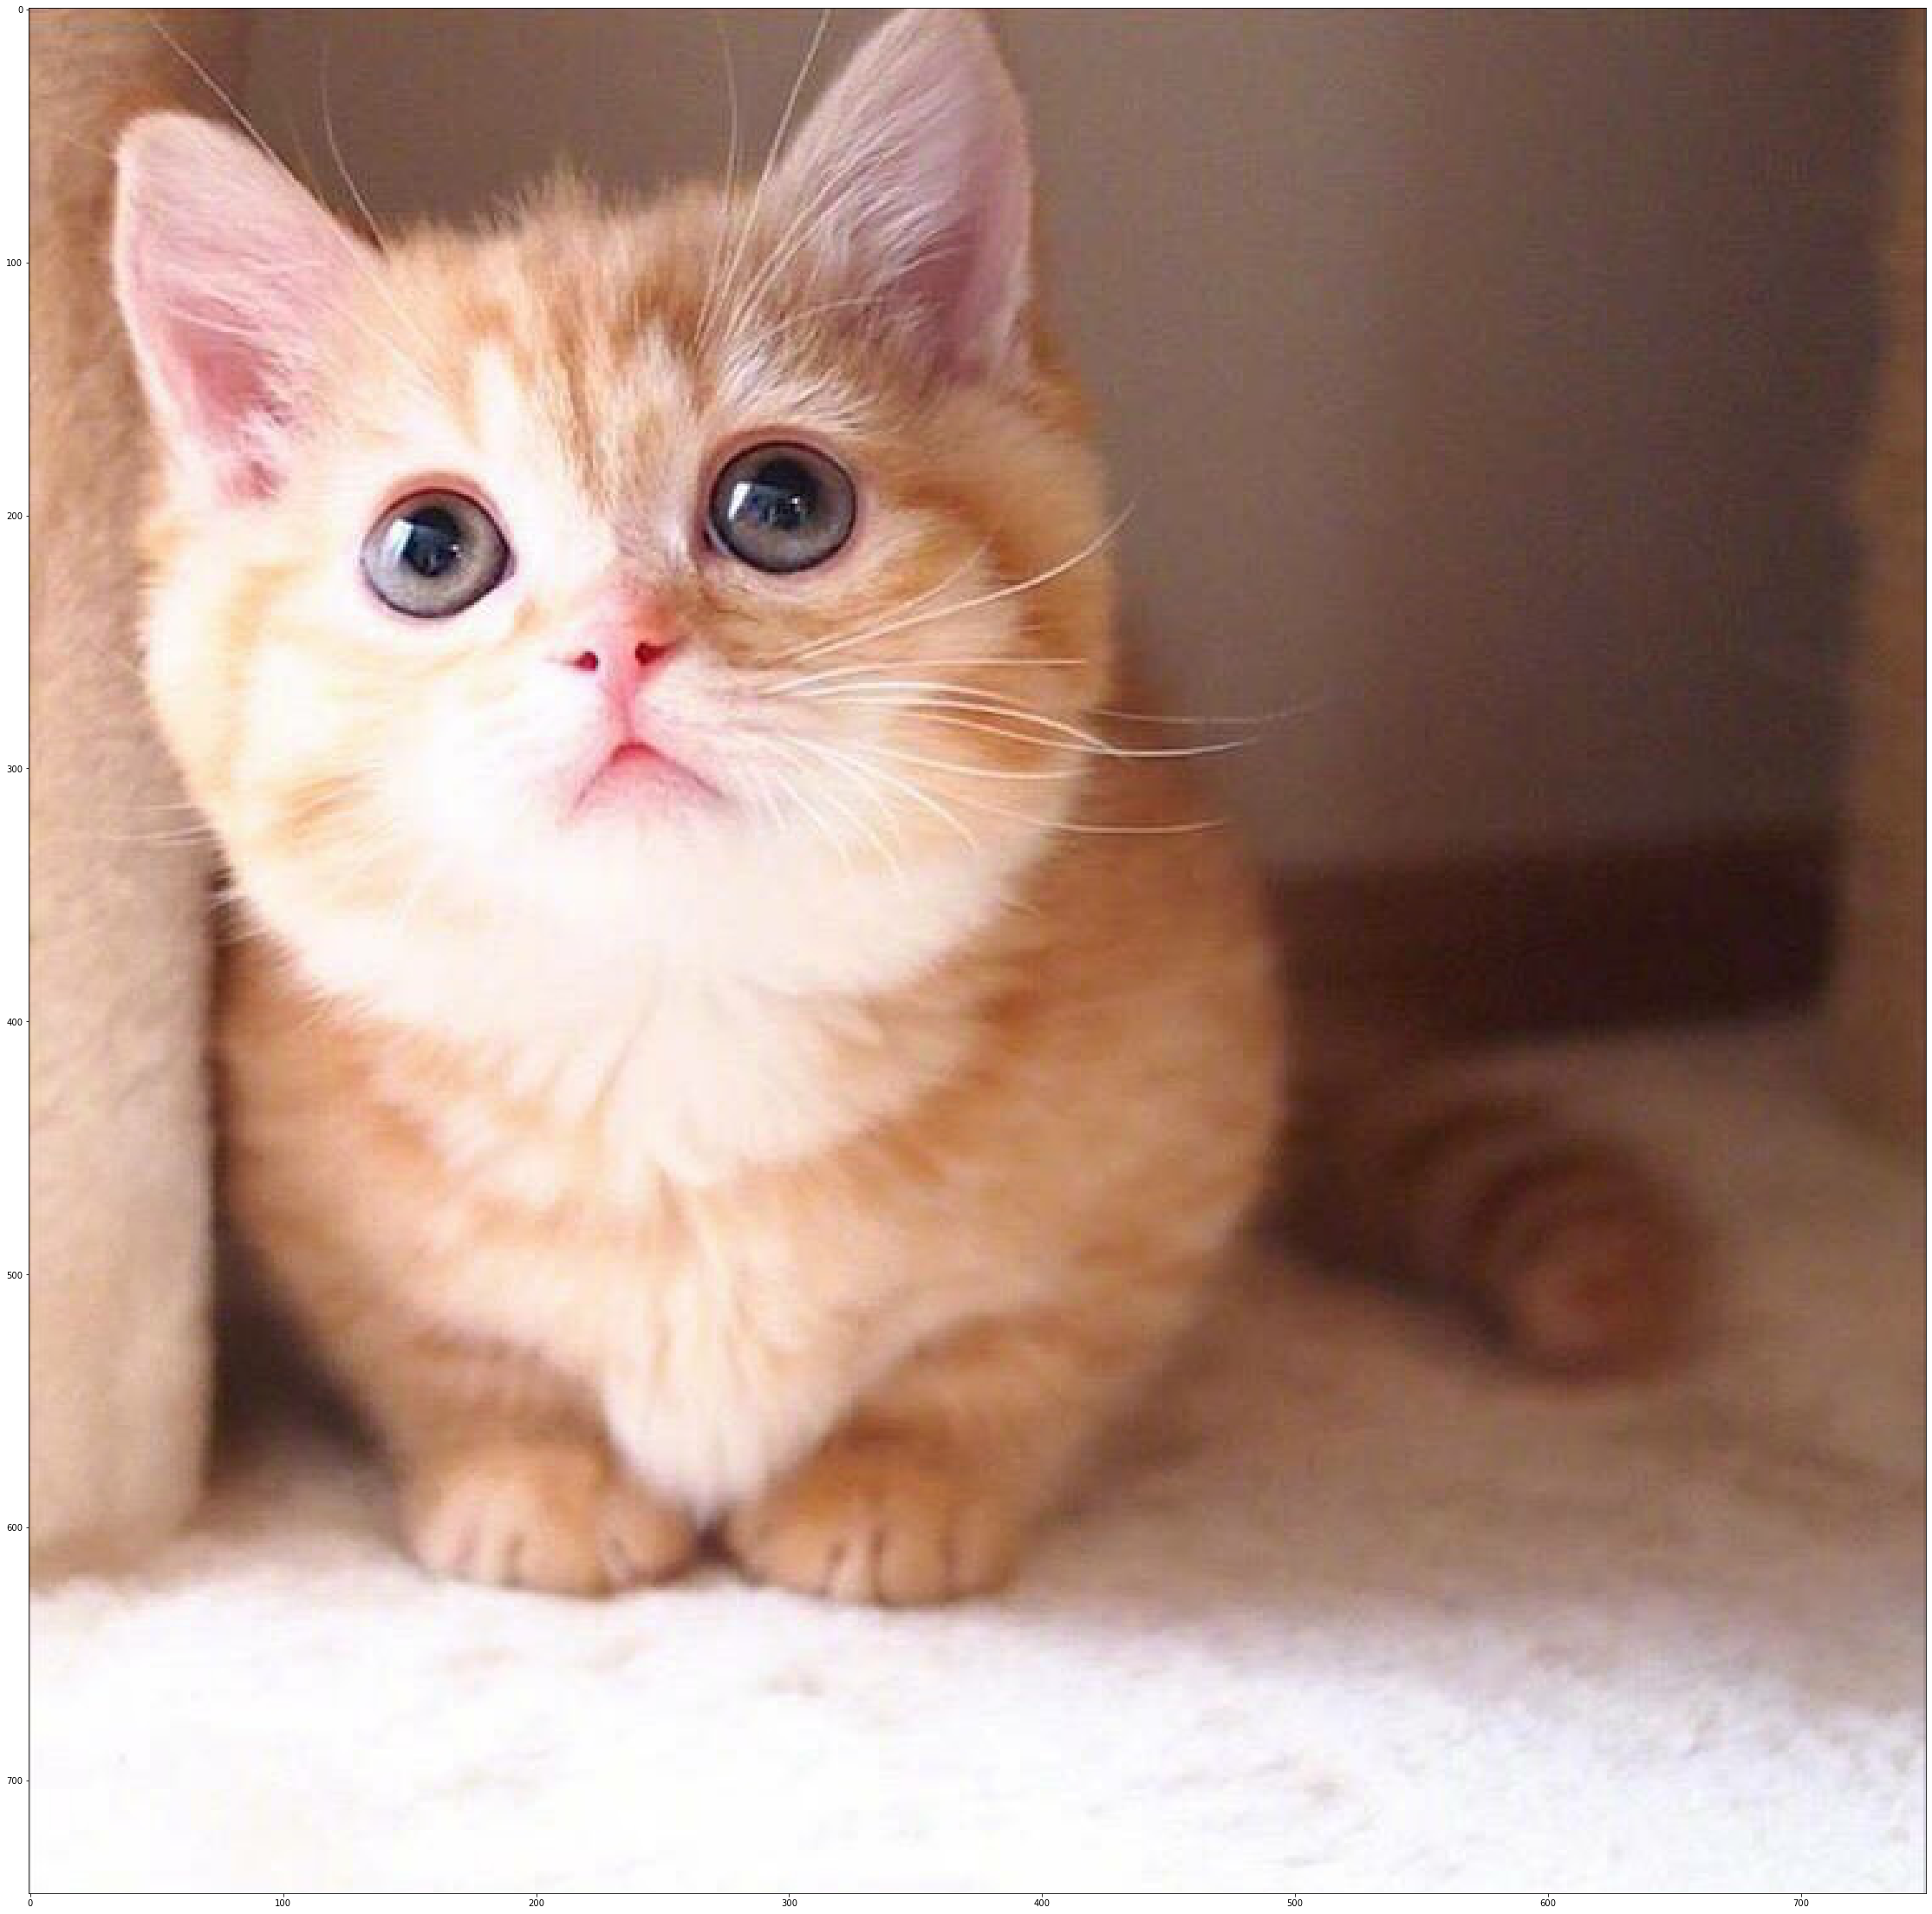

In [38]:
#自己找图片来识别
from PIL import Image
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
 
num_px = 64
image = Image.open('8.jpg')
 
my_image = np.array(image.resize((num_px,num_px),Image.ANTIALIAS))
 
my_image = my_image.reshape(num_px*num_px*3 , -1)
 
predict_my_image = predict(my_image , my_label_y ,parameters)
 
plt.imshow(image)
 
print("y = " + str(np.squeeze(predict_my_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(predict_my_image))].decode("utf-8") + "\"picture.")